<a href="https://colab.research.google.com/github/Zzmirror/AI_medic/blob/main/AI_medic/cifar10/Copy_of_CNN_DermaMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
 
!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data=np.load('Data.npz')
print(data.files)
print("train_labels : " ,data['train_labels'].shape)
print("train_images : " , data['train_images'].shape)
print("val_images :" , data['val_images'].shape)
print("test_images :" , data['test_images'].shape)
print("train_labels" , data['train_labels'].shape)

--2021-08-16 17:54:51--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  7.84MB/s    in 2.4s    

2021-08-16 17:54:55 (7.84 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']
train_labels :  (7007, 1)
train_images :  (7007, 28, 28, 3)
val_images : (1003, 28, 28, 3)
test_images : (2005, 28, 28, 3)
train_labels (7007, 1)


In [ ]:
for i in range(7):
  print("class " , i ,":"  , np.count_nonzero(data['train_labels'] == i))

class  0 : 228
class  1 : 359
class  2 : 769
class  3 : 80
class  4 : 779
class  5 : 4693
class  6 : 99


## preprosseing:

In [ ]:
 
X_train= data['train_images'] / 255
X_val = data['val_images'] / 255
X_test = data['test_images'] / 255
 
Y_train = to_categorical(data['train_labels'])
Y_val = to_categorical(data['val_labels'])
Y_test = to_categorical(data['test_labels'])
 
print(Y_train.shape)

(7007, 7)


# setting class weight :

In [ ]:

class_weight = {0: 20,
                1: 20 ,
               2 : 20 ,
               3 : 50 ,
               4 : 20 ,
                5 : 1 ,
               6 : 50}

# creating ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    brightness_range=(0.3, 1.8),
    shear_range=5,
    zoom_range=0.2,
    fill_mode = 'wrap',
    horizontal_flip = True, 
)

datagen_validation = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    brightness_range=(0.3, 1.8),
    shear_range=5,
    zoom_range=0.2,
    fill_mode = 'wrap',
    horizontal_flip = True, 
)

train_gen = datagen_train.flow(X_train, Y_train, batch_size=32)
val_gen = datagen_validation.flow(X_train, Y_train, batch_size=32)




## VGG16  artichecture :

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout , AvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

creating our main model :



In [ ]:
 
 
model = Sequential()
 
model.add(Conv2D(32, (3 , 3), activation='relu', padding='same', input_shape=(28, 28, 3) , kernel_regularizer=l2(0.001) ))
model.add(Conv2D(32, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(AvgPool2D((2, 2), strides=(2 , 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(AvgPool2D((2, 2), strides=(2 , 2)))
model.add(Dropout(0.2)) 
 
model.add(Conv2D(128, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(AvgPool2D((2 , 2), strides=(2 , 2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(Conv2D(512, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(Conv2D(512, (3 , 3), activation='relu', padding='same' , kernel_regularizer=l2(0.001)))
model.add(AvgPool2D((2, 2), strides=(2 , 2)))
model.add(Dropout(0.2))
 
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0

creating a simple modle for testing DataGenerator

In [ ]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)  ))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same' ))
model.add(MaxPool2D((3, 3), strides=(2, 2)))
 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same' ))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same' ))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same' ))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2 , 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same' ))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same' ))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
 
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train , batch_size=32, epochs=100,  validation_data=(X_val, Y_val))

Epoch 1/100
219/219 [==============================] - 36s 18ms/step - loss: 2.1111 - acc: 0.6662 - val_loss: 1.7028 - val_acc: 0.6690
Epoch 2/100
219/219 [==============================] - 3s 14ms/step - loss: 1.5309 - acc: 0.6698 - val_loss: 1.4526 - val_acc: 0.6690
Epoch 3/100
219/219 [==============================] - 3s 14ms/step - loss: 1.3933 - acc: 0.6698 - val_loss: 1.3301 - val_acc: 0.6690
Epoch 4/100
219/219 [==============================] - 3s 14ms/step - loss: 1.2951 - acc: 0.6698 - val_loss: 1.2635 - val_acc: 0.6690
Epoch 5/100
219/219 [==============================] - 3s 14ms/step - loss: 1.2329 - acc: 0.6696 - val_loss: 1.1839 - val_acc: 0.6810
Epoch 6/100
219/219 [==============================] - 3s 14ms/step - loss: 1.1760 - acc: 0.6759 - val_loss: 1.1721 - val_acc: 0.6780
Epoch 7/100
219/219 [==============================] - 3s 14ms/step - loss: 1.1351 - acc: 0.6778 - val_loss: 1.0983 - val_acc: 0.6790
Epoch 8/100
219/219 [==============================] - 3s 14m

In [ ]:
#this is for DataGenerator
 
history = model.fit_generator(train_gen, steps_per_epoch=218, epochs=100,validation_data=val_gen, validation_steps=31)

In [ ]:
#this is for weight setting
history = model.fit(X_train, Y_train , batch_size=32, epochs=100, class_weight=class_weight ,
                    validation_data=(X_val, Y_val))

## Learning curve

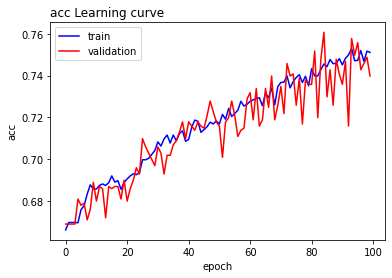

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], 'b-' , label = 'train' )
plt.plot(history.history['val_acc'], 'r-' , label = 'validation' )
plt.title("acc Learning curve", loc = 'left')
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()

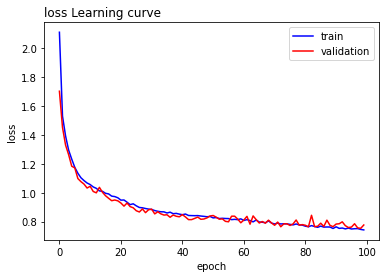

In [ ]:
plt.plot(history.history['loss'], 'b-', label = 'train')
plt.plot(history.history['val_loss'], 'r-' , label = 'validation')
plt.title("loss Learning curve", loc = 'left')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

## Testing on Test data :

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test acc:', acc)

63/63 [==============================] - 1s 9ms/step - loss: 0.7825 - acc: 0.7352
Test loss: 0.7824896574020386
Test acc: 0.735162079334259


## classification_report and confusion_matrix

In [ ]:
from sklearn.metrics import classification_report
 
y_pred = model.predict_classes(X_test)
y_test = np.argmax(Y_test, axis=1) # Convert one-hot to index
print(y_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[5 3 4 ... 5 5 5]
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        66
           1       0.38      0.53      0.45       103
           2       0.51      0.45      0.48       220
           3       0.00      0.00      0.00        23
           4       0.50      0.09      0.15       223
           5       0.82      0.95      0.88      1341
           6       0.50      0.59      0.54        29

    accuracy                           0.74      2005
   macro avg       0.43      0.40      0.39      2005
weighted avg       0.70      0.74      0.70      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


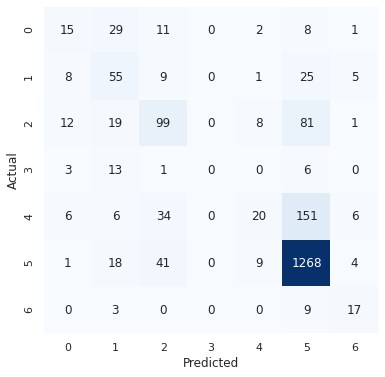

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
 
labels = ['0', '1', '2', '3', '4', '5', '6']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6 , 6))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()